**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Indices de Validación de Clusters Interno

## Lectura de datos y visualización

In [22]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import requests
import io
import requests
import time

In [24]:
urls = ["https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/1.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/2.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/3.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/4.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/5.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/6.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/7.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/8.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/9.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/10.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/11.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/12.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/13.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/14.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/15.csv"]

In [25]:
fuentes = [r'1.csv',
           r'2.csv',
           r'3.csv',
           r'4.csv',
           r'5.csv',
           r'6.csv',
           r'7.csv',
           r'8.csv',
           r'9.csv',
           r'10.csv',
           r'11.csv',
           r'12.csv',
           r'13.csv',
           r'14.csv',
           r'15.csv']

In [26]:
Inception = zip(urls, fuentes)

In [27]:
def download_url(args):
    t0 = time.time()
    url, fn = args[0], args[1]
    try:
        r = requests.get(url)
        with open(fn, 'wb') as f:
            f.write(r.content)
        return(url, time.time() - t0)
    except Exception as e:
        print('Exception in download_url():', e)

In [28]:
t0 = time.time()
for i in Inception:
    result = download_url(i)
    print('url:', result[0], 'time:', result[1])
print('Total time:', time.time() - t0)

url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/1.csv time: 0.1959669589996338
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/2.csv time: 0.17352080345153809
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/3.csv time: 0.15642666816711426
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/4.csv time: 0.17081975936889648
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/5.csv time: 0.14899921417236328
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/6.csv time: 0.16986989974975586
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/7.csv time: 0.21343994140625
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/8.csv time: 0.1593177318572998
url: https://raw.githubusercontent.com/javierfernandobotia/An

In [29]:
data = pd.concat(map(pd.read_csv, ['1.csv','2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '9.csv', '10.csv',
                                   '11.csv', '12.csv', '13.csv', '14.csv', '15.csv'], ','), ignore_index = True, sort = False, axis = 1)
display(data)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  sort=sort,


,0,1,2,3
0,0.030639,0.14982,3.48680,9.2755
1,0.069763,-0.29965,1.94770,9.1120
2,0.099823,-1.68890,1.41650,10.1200
3,0.129820,-2.17930,0.95342,10.9240
4,0.159790,-2.30180,0.23155,10.6510
...,...,...,...,...
5063,154.070000,-0.69464,5.05310,8.0769
5064,154.100000,-0.14982,5.17570,9.0030
5065,154.140000,-0.53119,5.32560,8.1177
5066,154.170000,-0.80360,5.28470,7.8589


In [30]:
data = pd.DataFrame(data.values, columns = ['Time(s)', 'x acceleration', 'y acceleration', 'z acceleration'])
display(data)

,Time(s),x acceleration,y acceleration,z acceleration
0,0.030639,0.14982,3.48680,9.2755
1,0.069763,-0.29965,1.94770,9.1120
2,0.099823,-1.68890,1.41650,10.1200
3,0.129820,-2.17930,0.95342,10.9240
4,0.159790,-2.30180,0.23155,10.6510
...,...,...,...,...
5063,154.070000,-0.69464,5.05310,8.0769
5064,154.100000,-0.14982,5.17570,9.0030
5065,154.140000,-0.53119,5.32560,8.1177
5066,154.170000,-0.80360,5.28470,7.8589


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5068 entries, 0 to 5067
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time(s)         5068 non-null   float64
 1   x acceleration  5068 non-null   float64
 2   y acceleration  5068 non-null   float64
 3   z acceleration  5068 non-null   float64
dtypes: float64(4)
memory usage: 158.5 KB


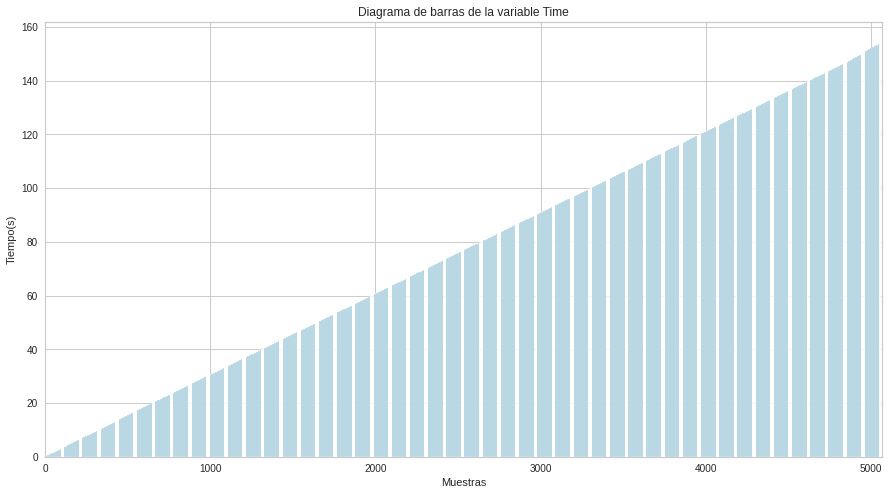

In [32]:
fig = plt.figure(figsize=(15,8))
plt.bar(np.arange(len(data['Time(s)'])), data['Time(s)'])
plt.xlabel('Muestras')
plt.ylabel('Tiempo(s)')
plt.title('Diagrama de barras de la variable Time')
plt.xlim(0, len(data['Time(s)']))
plt.show()

In [33]:
data.describe()

,Time(s),x acceleration,y acceleration,z acceleration
count,5068.000000,5068.000000,5068.000000,5068.000000
mean,76.832608,-3.555093,8.559052,-0.845743
std,44.229309,2.486158,2.955841,2.911633
min,0.030639,-9.343600,0.000000,-7.927000
25%,38.592500,-5.284700,6.129200,-2.601500
50%,76.835000,-3.486800,8.921300,-1.144100
75%,115.017500,-2.179300,10.651000,-0.040861
max,154.200000,10.951000,15.786000,12.599000


In [34]:
TIME = data['Time(s)']
X = data[['x acceleration','y acceleration', 'z acceleration']]

In [35]:
TIME

0         0.030639
1         0.069763
2         0.099823
3         0.129820
4         0.159790
           ...    
5063    154.070000
5064    154.100000
5065    154.140000
5066    154.170000
5067    154.200000
Name: Time(s), Length: 5068, dtype: float64

In [36]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler(feature_range = (0,1))
X_norm = MM.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns = ['x acceleration','y acceleration', 'z acceleration'])

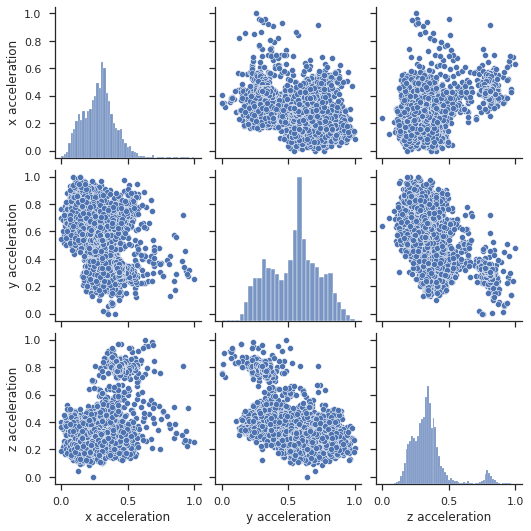

In [37]:
import seaborn as sns

sns.set_theme(style="ticks")
sns.pairplot(X_norm)
plt.show()

## Búsqueda del número óptimo de clusters con el algoritmo KMeans

In [38]:
!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from sklearn.cluster import KMeans # Algoritmo KMeans
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabasz_score # Método de validación Calinski-Harabasz
from sklearn.metrics import davies_bouldin_score # Método de validación Davies Bouldin
from validclust.indices import dunn # Método de validación Dunn
from yellowbrick.cluster import KElbowVisualizer # Visualizador del diagrama del codo
from sklearn.metrics import pairwise_distances
import numpy as np

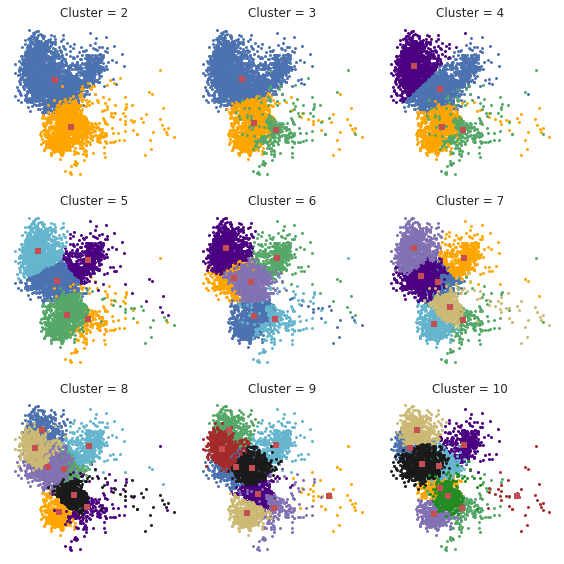

In [40]:
x1 = X_norm['x acceleration']
x2 = X_norm['y acceleration']
feature_A = 0
feature_B = 1

fig1,axes1 = plt.subplots(3,3,figsize = (8,8))
error = 1e-4
max_iteraciones = 5000
colors = ["b", "orange", "g", "indigo", "c", "m", "y", "k", "Brown", "ForestGreen"]

Modelos = []
Vector_Clases = []
Matriz_Centros = []

Silueta = []
CH = []
DB = []
DU = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
  Modelo_Kmeans = KMeans(n_clusters = ncenters, max_iter = max_iteraciones, tol = error, random_state = 17)
  Modelo_Kmeans.fit(X_norm)
  Clases = Modelo_Kmeans.labels_
  Centros = Modelo_Kmeans.cluster_centers_
  Modelos.append(Modelo_Kmeans)
  Vector_Clases.append(Clases)
  Matriz_Centros.append(Centros)
  
  Silueta.append(silhouette_score(X_norm, Clases))
  CH.append(calinski_harabasz_score(X_norm, Clases))
  DB.append(davies_bouldin_score(X_norm, Clases))
  dist = pairwise_distances(X_norm)
  DU.append(dunn(dist,Clases))
  
  for j in range(ncenters):
    ax.plot(x1[Clases == j], x2[Clases == j], '.', color = colors[j])
  
  for pt in Centros:
    ax.plot(pt[feature_A],pt[feature_B],'rs')

  ax.set_title('Cluster = {0}'.format(ncenters))
  ax.axis('off')

fig1.tight_layout()
plt.show()

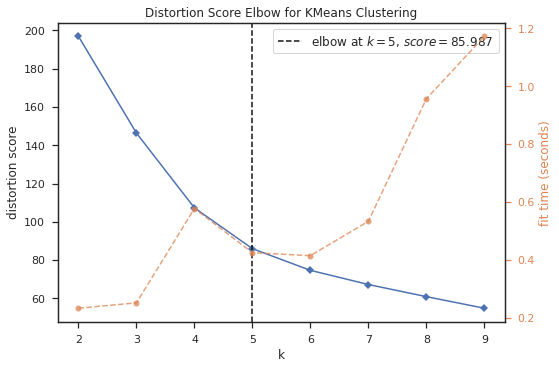

In [41]:
fig, ax = plt.subplots()
Codito = KElbowVisualizer(KMeans(max_iter = max_iteraciones, tol = error, random_state = 17), 
                              k = (2,10), ax = ax)
Codito.fit(X_norm)
ax.set_xticks(range(2,10))
Codito.show()
plt.show()

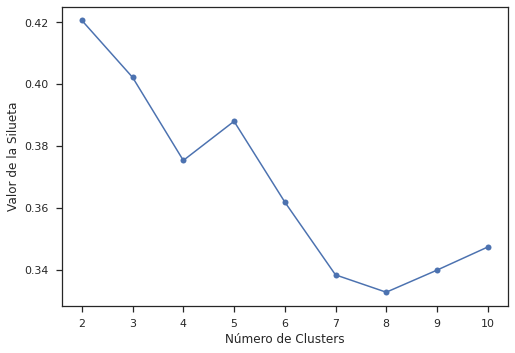

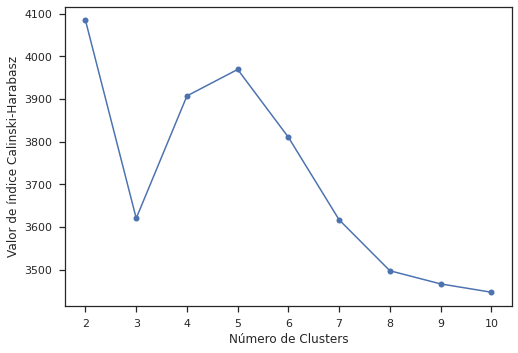

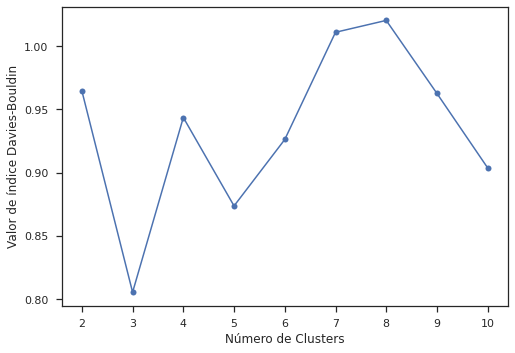

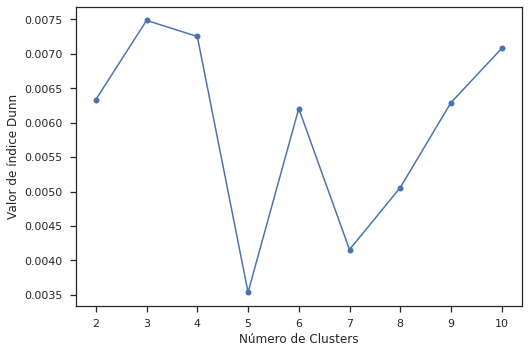

In [42]:
fig3, ax3 = plt.subplots()
ax3.plot(np.r_[2:11], Silueta, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de la Silueta")

fig4, ax4 = plt.subplots()
ax4.plot(np.r_[2:11], CH, marker = 'o')
ax4.set_xlabel("Número de Clusters")
ax4.set_ylabel("Valor de índice Calinski-Harabasz")

fig5, ax5 = plt.subplots()
ax5.plot(np.r_[2:11], DB, marker = 'o')
ax5.set_xlabel("Número de Clusters")
ax5.set_ylabel("Valor de índice Davies-Bouldin")
plt.show()

fig6, ax6 = plt.subplots()
ax6.plot(np.r_[2:11], DU, marker = 'o')
ax6.set_xlabel("Número de Clusters")
ax6.set_ylabel("Valor de índice Dunn")
plt.show()

**Notas:**  
- Silueta -> es el valor máximo para obtener el número óptimo de clusters
- Silueta = 2
- Codo = 5
- CH = 2
- Davies Bouldin -> es el valor mínimo para obtener el número óptimo de clusters
  - DB = 3
- Dunn -> también valor mínimo
  - DU = 5
  
- En estos casos, seleccionar la menor cantidad: 2 o 3

In [43]:
Opcion_1 = pd.concat([X_norm,pd.DataFrame(Vector_Clases[0], columns = ['Clases'])], axis = 1)
Opcion_2 = pd.concat([X_norm,pd.DataFrame(Vector_Clases[1], columns = ['Clases'])], axis = 1)

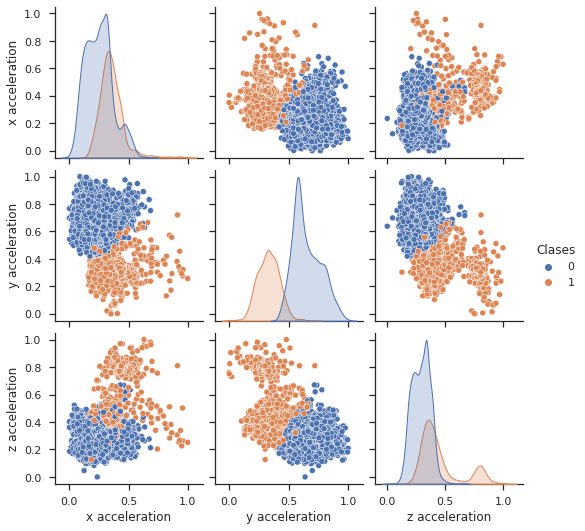

In [44]:
sns.set_theme(style="ticks")
sns.pairplot(Opcion_1, hue = 'Clases')
plt.show()

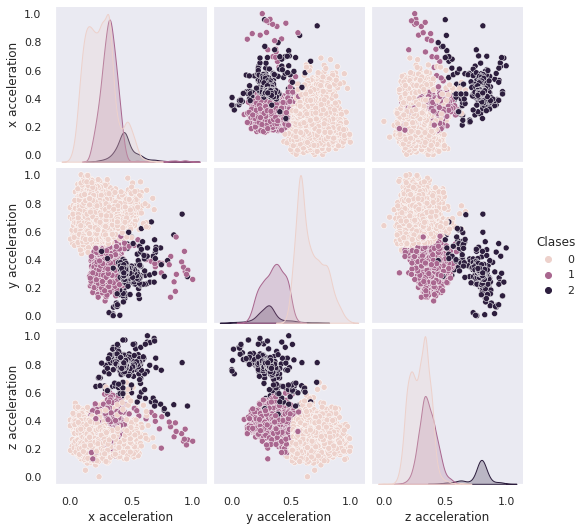

In [45]:
sns.set_theme(style="dark")
sns.pairplot(Opcion_2, hue = 'Clases')
plt.show()

In [46]:
display(Opcion_1)

,x acceleration,y acceleration,z acceleration,Clases
0,0.467781,0.220879,0.838083,1
1,0.445633,0.123381,0.830118,1
2,0.377179,0.089731,0.879226,1
3,0.353015,0.060397,0.918396,1
4,0.346979,0.014668,0.905096,1
...,...,...,...,...
5063,0.426171,0.320100,0.779689,1
5064,0.453016,0.327866,0.824808,1
5065,0.434224,0.337362,0.781677,1
5066,0.420802,0.334771,0.769068,1


In [48]:
from joblib import dump, load # Permite guardar y cargar modelos

dump(Modelos[0], 'Modelo_Kmeans_2_clusters.joblib')

['Modelo_Kmeans_2_clusters.joblib']

In [49]:
Modelo_Cargado = load('Modelo_Kmeans_2_clusters.joblib')
Modelo_Cargado

KMeans(max_iter=5000, n_clusters=2, random_state=17)

## Métodos de Diagnóstico de Clusters

In [50]:
!pip install data-science-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Cardinalidad vs Magnitud de los Clusters

In [51]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean

In [52]:
Centros_2_Clusters = Centros[0]
Clases_2_Clusters = Vector_Clases[0] 

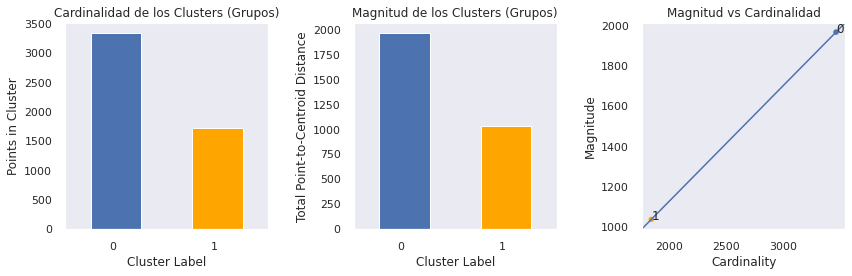

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(Clases_2_Clusters,
                         ax=ax1,
                         title="Cardinalidad de los Clusters (Grupos)",
                         color = colors[0:2]
                        )
plot_cluster_magnitude(X_norm,
                       Clases_2_Clusters,
                       Centros_2_Clusters,
                       euclidean,
                       ax=ax2,
                       title="Magnitud de los Clusters (Grupos)",
                       color = colors[0:2]
                      )
plot_magnitude_vs_cardinality(X_norm,
                              Clases_2_Clusters,
                              Centros_2_Clusters,
                              euclidean,
                              color = colors[0:2],
                              ax = ax3, 
                              title="Magnitud vs Cardinalidad")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

### Diagrama del Radar

In [54]:
## Fuente original del código Radar: https://towardsdatascience.com/best-practices-for-visualizing-your-cluster-results-20a3baac7426
## Autor: Konstantin Rink

class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)
        
        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
        self.ax.set_yticklabels([])
        
        for ax in self.axes[1:]:
            ax.xaxis.set_visible(False)
            ax.set_yticklabels([])
            ax.set_zorder(-99)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.spines['polar'].set_color('black')
            ax.spines['polar'].set_zorder(-99)
                     
    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        kw['label'] = '_noLabel'
        self.ax.fill(angle, values,*args,**kw)

In [55]:
Modelo_Kmeans_Seleccionado = Modelos[0]
Modelo_Kmeans_Seleccionado

KMeans(max_iter=5000, n_clusters=2, random_state=17)

In [56]:
X_norm_media = pd.concat([pd.DataFrame(Opcion_1.mean().drop('Clases'), columns=['media']), 
                   Opcion_1.groupby('Clases').mean().T], axis=1)
display(X_norm_media)

,media,0,1
x acceleration,0.285224,0.249727,0.354138
y acceleration,0.542193,0.651417,0.330146
z acceleration,0.344990,0.290722,0.450344


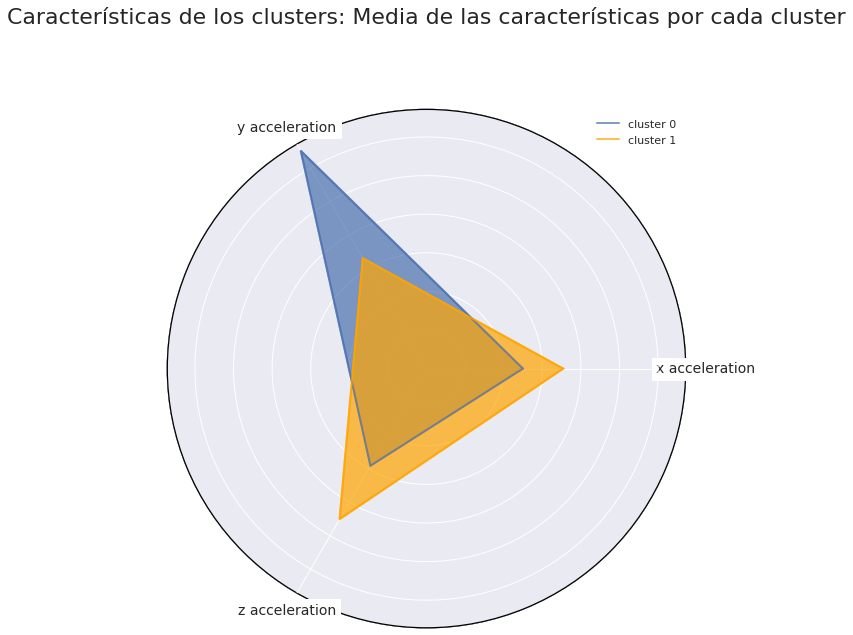

In [57]:
fig = plt.figure(figsize=(8, 8))
no_features = len(Modelo_Kmeans_Seleccionado.feature_names_in_)
radar = Radar(fig, Modelo_Kmeans_Seleccionado.feature_names_in_, np.unique(Clases_2_Clusters))

for k in range(0,Modelo_Kmeans_Seleccionado.n_clusters):
    cluster_data = X_norm_media[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color = colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Características de los clusters: Media de las características por cada cluster", size=22, pad=60)
plt.show()

**Notas:**  
- Cluster 0 tiene una alta dependencia de la variable "y acceleration"
- Cluster 1 tuvo un poco más revelancia en la variable z, sin embargo, con las otras también tuvo influencia

### Diagrama de la Desviación de las Característricas por cada Cluster

In [58]:
X_norm_dev_rel = X_norm_media.apply(lambda x: round((x-x['media'])/x['media'],2)*100, axis = 1)
X_norm_dev_rel.drop(columns=['media'], inplace=True)
display(X_norm_dev_rel)

,0,1
x acceleration,-12.0,24.0
y acceleration,20.0,-39.0
z acceleration,-16.0,31.0


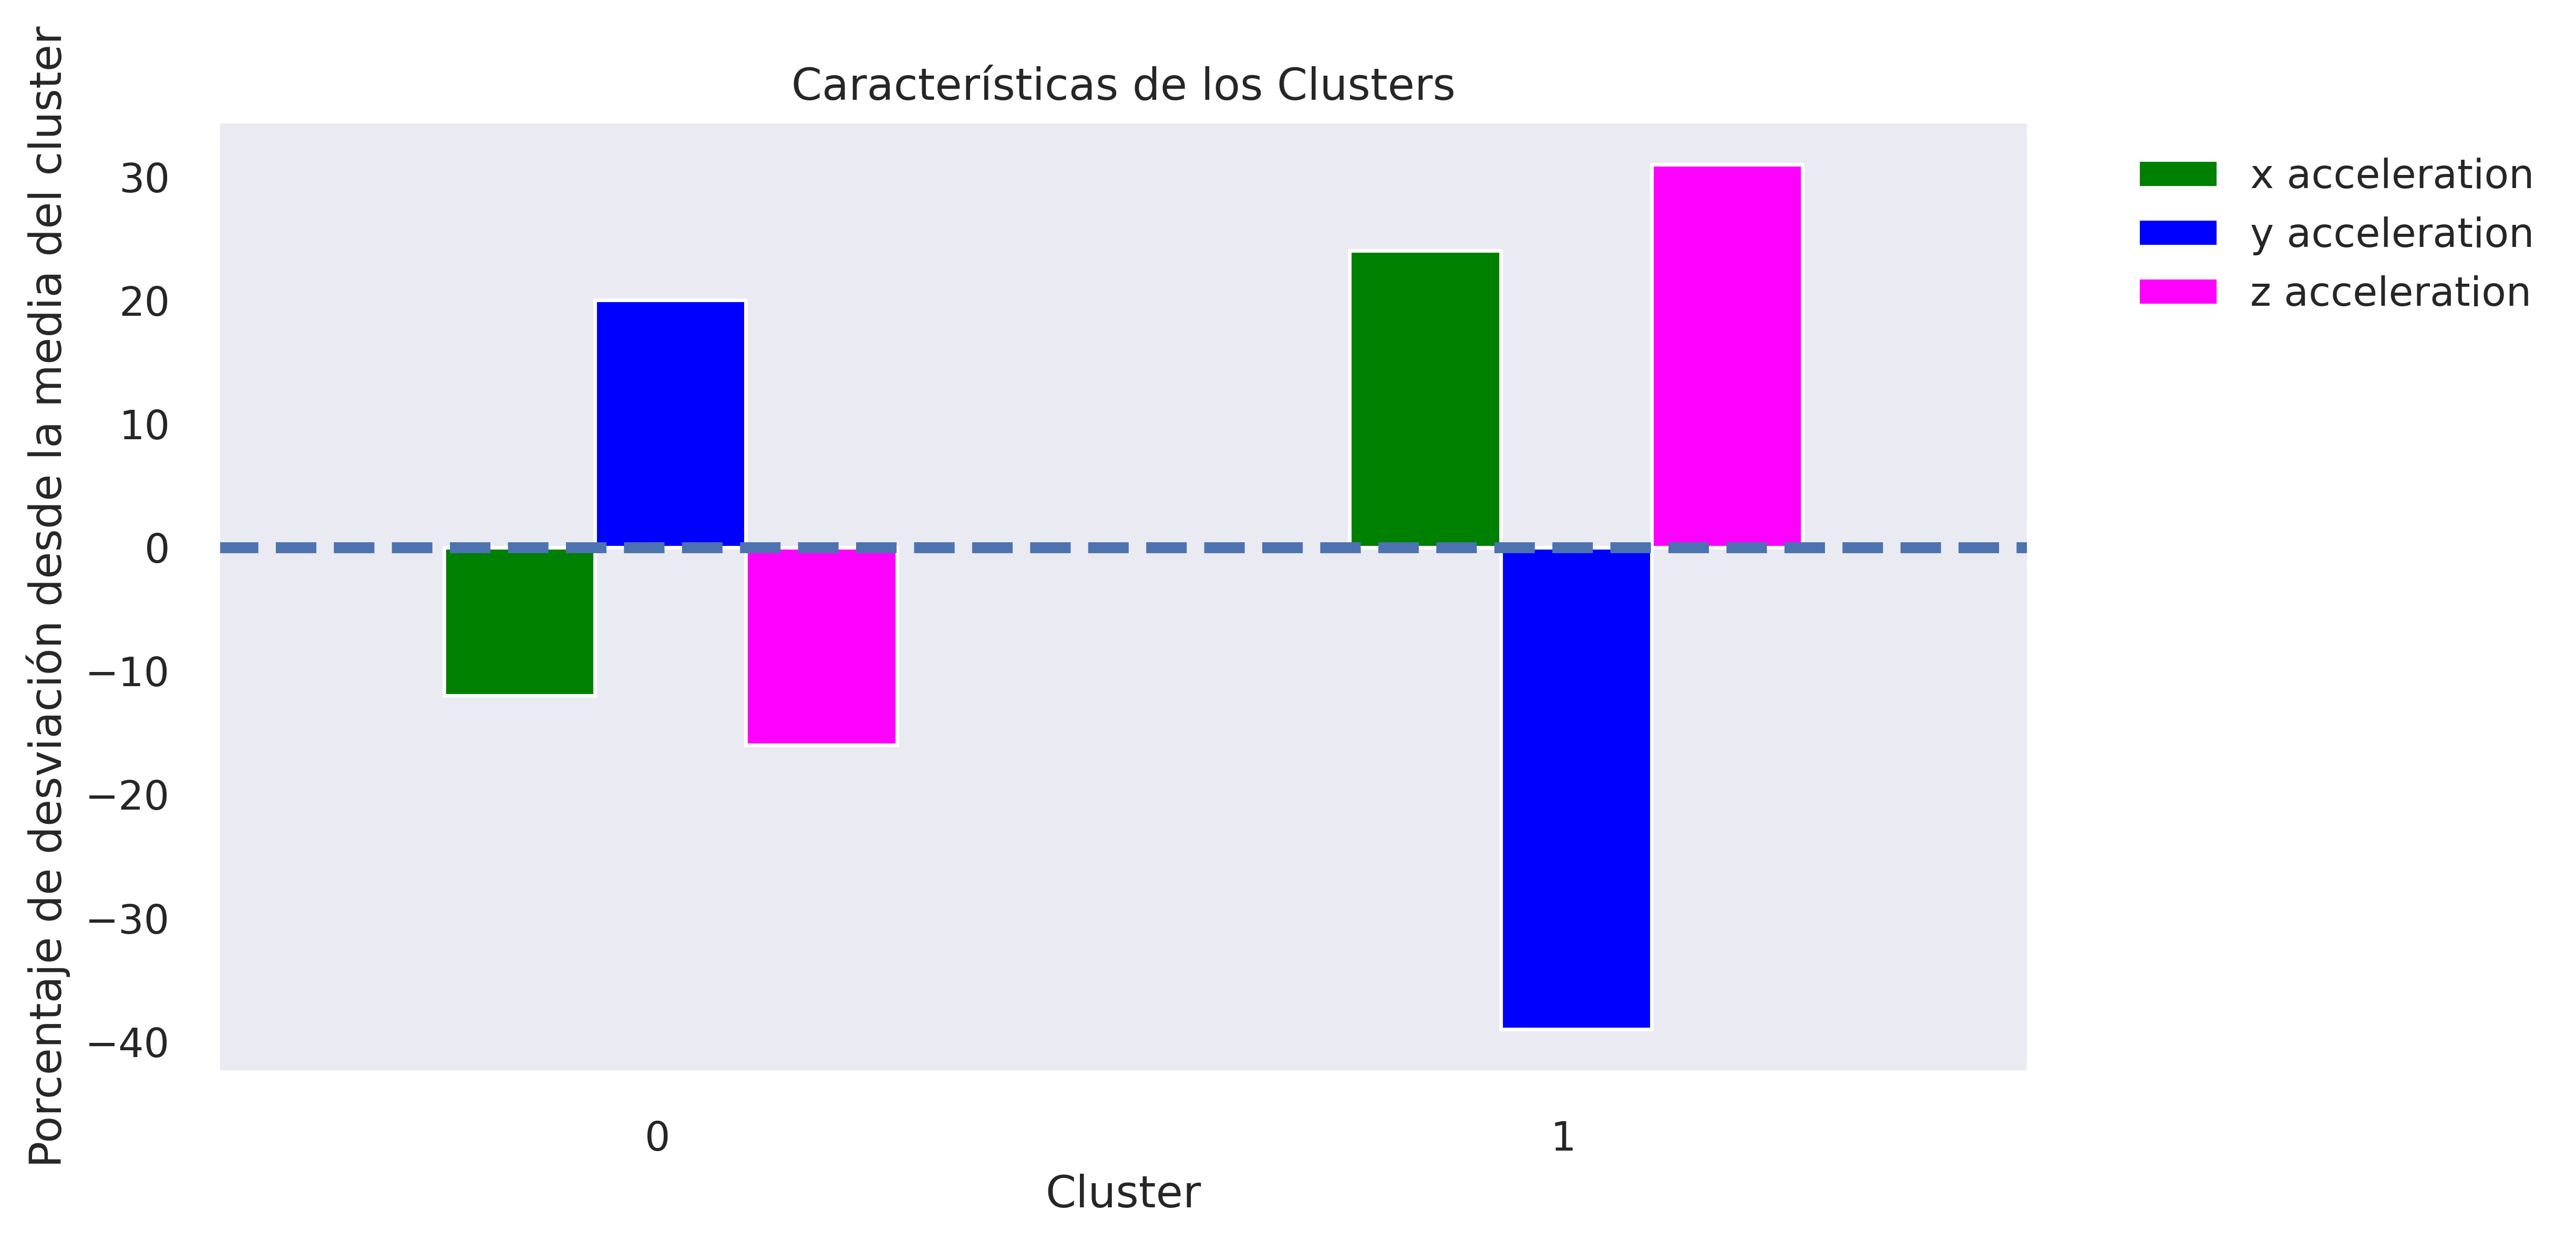

In [59]:
fig = plt.figure(figsize=(10,5), dpi=500)
colores_caracteristicas = ['green', 'blue', 'magenta'] # De acuerdo al número de características

X_norm_dev_rel.T.plot(kind='bar',ax=fig.add_subplot(),title="Características de los Clusters", 
                       color = colores_caracteristicas,
                       xlabel="Cluster",
                       ylabel="Porcentaje de desviación desde la media del cluster"
                      )

plt.axhline(y = 0, linewidth = 3, ls='--', color='b')
plt.legend(bbox_to_anchor = (1.04,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

## Predicción de clases desde el modelo creado por el algoritmo KMeans

In [60]:
urls = ["https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/16.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/17.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/18.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/19.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/20.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/21.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/22.csv"]

In [61]:
nuevas_fuentes = [r'16.csv', r'17.csv', r'18.csv', r'19.csv', r'20.csv', r'21.csv', r'22.csv']

In [62]:
Origen = zip(urls, nuevas_fuentes)

In [63]:
t0 = time.time()
for i in Origen:
    result = download_url(i)
    print('url:', result[0], 'time:', result[1])
print('Total time:', time.time() - t0)

url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/16.csv time: 0.16529393196105957
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/17.csv time: 0.37408971786499023
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/18.csv time: 0.35946059226989746
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/19.csv time: 0.1439189910888672
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/20.csv time: 0.36052727699279785
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/21.csv time: 0.24700284004211426
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/22.csv time: 0.23189163208007812
Total time: 1.9006292819976807


In [64]:
data_nueva = pd.concat(map(pd.read_csv, ['16.csv','17.csv', '18.csv', '19.csv', '20.csv', '21.csv', '22.csv'], ','), 
                       ignore_index = True, sort = False, axis = 1)
display(data_nueva)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  sort=sort,


,0,1,2,3
0,0.23032,-0.19068,5.7069,7.2460
1,0.26294,-0.00000,5.6661,7.6683
2,0.29993,0.10896,5.7478,8.0088
3,0.32993,-0.27241,5.6252,6.8919
4,0.35996,-0.38137,5.6661,6.6604
...,...,...,...,...
1722,54.92100,-0.80360,5.2438,7.6683
1723,54.96000,-0.80360,5.1757,8.3084
1724,54.99000,-0.80360,5.3256,8.3084
1725,55.02000,-0.69464,5.0940,8.1995


In [65]:
data_nueva = pd.DataFrame(data_nueva.values, columns = ['Time(s)', 'x acceleration', 'y acceleration', 'z acceleration'])
display(data_nueva)

,Time(s),x acceleration,y acceleration,z acceleration
0,0.23032,-0.19068,5.7069,7.2460
1,0.26294,-0.00000,5.6661,7.6683
2,0.29993,0.10896,5.7478,8.0088
3,0.32993,-0.27241,5.6252,6.8919
4,0.35996,-0.38137,5.6661,6.6604
...,...,...,...,...
1722,54.92100,-0.80360,5.2438,7.6683
1723,54.96000,-0.80360,5.1757,8.3084
1724,54.99000,-0.80360,5.3256,8.3084
1725,55.02000,-0.69464,5.0940,8.1995


In [66]:
data_nueva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time(s)         1727 non-null   float64
 1   x acceleration  1727 non-null   float64
 2   y acceleration  1727 non-null   float64
 3   z acceleration  1727 non-null   float64
dtypes: float64(4)
memory usage: 54.1 KB


In [67]:
data_nueva.describe()

,Time(s),x acceleration,y acceleration,z acceleration
count,1727.000000,1727.000000,1727.000000,1727.000000
mean,27.561935,-1.356112,8.743452,1.344968
std,15.799819,2.918505,2.812411,3.611578
min,0.230320,-9.534200,-2.261000,-9.003000
25%,13.725000,-3.105400,6.319800,-0.912560
50%,28.080000,-1.076000,9.043900,0.531190
75%,41.195000,0.081722,10.651000,3.193950
max,55.050000,11.959000,17.243000,12.681000


In [68]:
TIME_nuevo = data_nueva['Time(s)']
X_nuevo = data_nueva[['x acceleration','y acceleration', 'z acceleration']]

In [69]:
MM = MinMaxScaler(feature_range = (0,1))
X_norm_nuevo = MM.fit_transform(X_nuevo)
X_norm_nuevo = pd.DataFrame(X_norm_nuevo, columns = ['x acceleration','y acceleration', 'z acceleration'])

In [70]:
Modelo_Kmeans_2_Clusters = Modelos[0] # Seleccionar Modelo Opción 1 
Modelo_Kmeans_3_Clusters = Modelos[1] # Seleccionar Modelo Opción 2

In [71]:
Clases_Predichas_2_Clases = Modelo_Kmeans_2_Clusters.fit_predict(X_norm_nuevo)
Clases_Predichas_3_Clases = Modelo_Kmeans_3_Clusters.fit_predict(X_norm_nuevo)

In [72]:
Opcion_1_Predicho = pd.concat([X_norm_nuevo,pd.DataFrame(Clases_Predichas_2_Clases, columns = ['Clases Predichas'])], axis = 1)
Opcion_2_Predicho = pd.concat([X_norm_nuevo,pd.DataFrame(Clases_Predichas_3_Clases, columns = ['Clases Predichas'])], axis = 1)

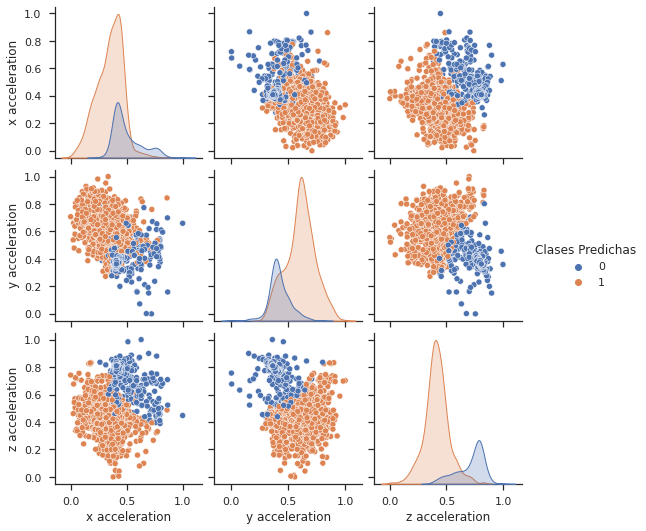

In [73]:
sns.set_theme(style="ticks")
sns.pairplot(Opcion_1_Predicho, hue = 'Clases Predichas')
plt.show()

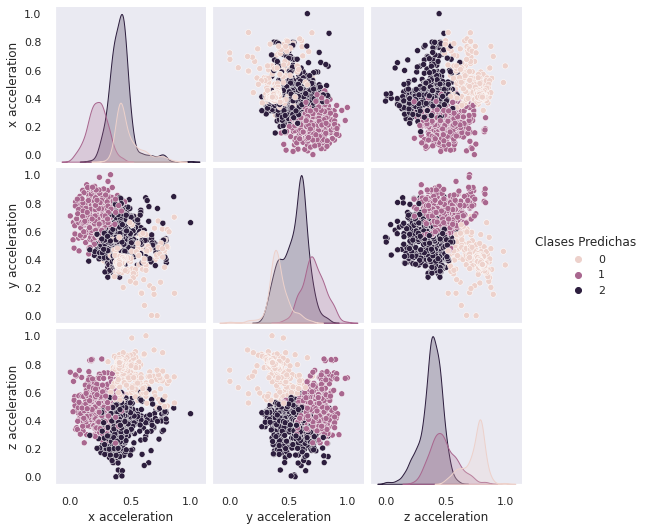

In [74]:
sns.set_theme(style="dark")
sns.pairplot(Opcion_2_Predicho, hue = 'Clases Predichas')
plt.show()

In [75]:
dist = pairwise_distances(X_norm_nuevo)

In [76]:
Tabla = np.array([[silhouette_score(X_norm_nuevo, Clases_Predichas_2_Clases),
                   calinski_harabasz_score(X_norm_nuevo, Clases_Predichas_2_Clases),
                   davies_bouldin_score(X_norm_nuevo, Clases_Predichas_2_Clases),
                   dunn(dist,Clases_Predichas_2_Clases)],[silhouette_score(X_norm_nuevo, Clases_Predichas_3_Clases),
                   calinski_harabasz_score(X_norm_nuevo, Clases_Predichas_3_Clases),
                   davies_bouldin_score(X_norm_nuevo, Clases_Predichas_3_Clases),
                   dunn(dist,Clases_Predichas_3_Clases)]])
Tabla = pd.DataFrame(Tabla, columns = ['Silueta', 'CH', 'DB', 'Dunn'], index = ['2 Clusters', '3 Clusters'])
display(Tabla)

,Silueta,CH,DB,Dunn
2 Clusters,0.428888,1041.844885,0.943417,0.014064
3 Clusters,0.361173,1104.959983,1.019124,0.011280


**Notas:**  
- Podría seleccionar cualquiera de las dos porque hay un empate técnico entre las cuatro métricas

## Comparando la mejor predicción del algoritmo KMeans con tres modelos de clasificación

In [77]:
from sklearn.naive_bayes import GaussianNB # Naive Bayes Gaussiano
from sklearn.tree import DecisionTreeClassifier # Árbol de decisión
from sklearn.svm import SVC ## Máquina de Soporte Vectorial
from sklearn.model_selection import GridSearchCV # Búsqueda de Cuadrículas

In [78]:
X_train = X_norm
Y_train = Vector_Clases[0]
X_test = X_norm_nuevo

In [79]:
Modelo_GNB = GaussianNB()
Modelo_GNB.fit(X_train, Y_train)
Clases_Predichas_GNB = Modelo_GNB.predict(X_test)

In [80]:
Por_Class_0 = pd.DataFrame(np.where(Y_train == 0)).shape[1]/pd.DataFrame(Y_train == 0).shape[0]
Por_Class_1 = pd.DataFrame(np.where(Y_train == 1)).shape[1]/pd.DataFrame(Y_train == 0).shape[0]

In [81]:
parametro_C = [1e-3, 1e-2, 1e-1, 0.1, 1, 10, 50, 100]
parametros = [{'C':parametro_C, 'kernel': ['linear']},{'C':parametro_C, 'kernel': ['rbf']}]
Modelo_SVM = SVC(class_weight= {0:Por_Class_0,1:Por_Class_1})
GSCV_SVM = GridSearchCV(estimator = Modelo_SVM, param_grid = parametros, scoring = 'accuracy', cv = 5, n_jobs = -1)
GSCV_SVM.fit(X_train, Y_train)
print("Puntaje SVM = ", GSCV_SVM.best_score_)
print("Parámetros SVM = ", GSCV_SVM.best_params_)

Puntaje SVM =  0.9970412254108814
Parámetros SVM =  {'C': 50, 'kernel': 'rbf'}


In [82]:
Modelo_SVM = GSCV_SVM.best_estimator_
Modelo_SVM.fit(X_train, Y_train)
Clases_Predichas_SVM = Modelo_SVM.predict(X_test)

In [83]:
parametro_entropia = ['gini', 'entropy']
parametro_max_depth = [5, 10, 15, 20, 25, 30]
parametros = [{'criterion':parametro_entropia, 'max_depth': parametro_max_depth}]
Modelo_DTC = DecisionTreeClassifier(class_weight= {0:Por_Class_0,1:Por_Class_1})
GSCV_DTC = GridSearchCV(estimator = Modelo_DTC, param_grid = parametros, scoring = 'accuracy', cv = 5, n_jobs = -1)
GSCV_DTC.fit(X_train, Y_train)
print("Puntaje DTC = ", GSCV_DTC.best_score_)
print("Parámetros DTC = ", GSCV_DTC.best_params_)

Puntaje DTC =  0.9885570424715386
Parámetros DTC =  {'criterion': 'entropy', 'max_depth': 15}


In [84]:
Modelo_DTC = GSCV_DTC.best_estimator_
Modelo_DTC.fit(X_train, Y_train)
Clases_Predichas_DTC = Modelo_DTC.predict(X_test)

In [85]:
Opcion_GNB_Predicho = pd.concat([X_norm_nuevo,pd.DataFrame(Clases_Predichas_GNB, columns = ['Clases Predichas'])], axis = 1)
Opcion_SVM_Predicho = pd.concat([X_norm_nuevo,pd.DataFrame(Clases_Predichas_SVM, columns = ['Clases Predichas'])], axis = 1)
Opcion_DTC_Predicho = pd.concat([X_norm_nuevo,pd.DataFrame(Clases_Predichas_DTC, columns = ['Clases Predichas'])], axis = 1)

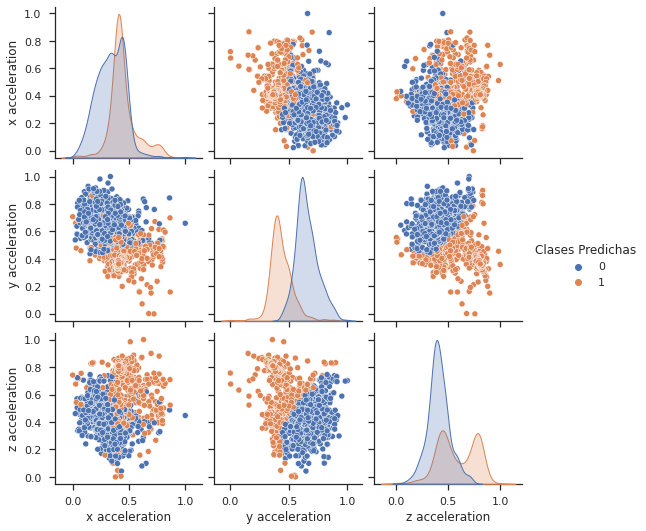

In [86]:
sns.set_theme(style="ticks")
sns.pairplot(Opcion_GNB_Predicho, hue = 'Clases Predichas')
plt.show()

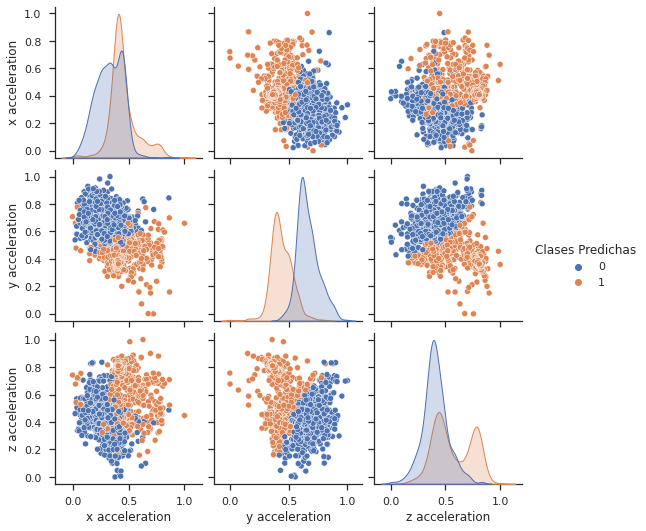

In [87]:
sns.set_theme(style="ticks")
sns.pairplot(Opcion_SVM_Predicho, hue = 'Clases Predichas')
plt.show()

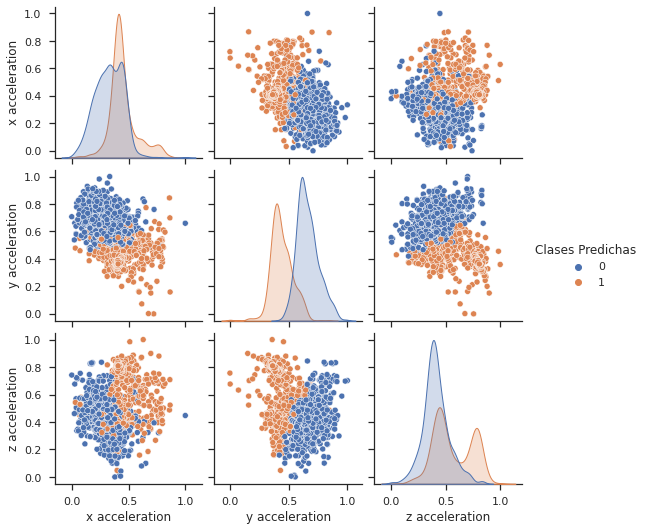

In [88]:
sns.set_theme(style="ticks")
sns.pairplot(Opcion_DTC_Predicho, hue = 'Clases Predichas')
plt.show()

In [89]:
Tabla_Resultados_GNB = np.array([silhouette_score(X_norm_nuevo, Clases_Predichas_GNB),
                   calinski_harabasz_score(X_norm_nuevo, Clases_Predichas_GNB),
                   davies_bouldin_score(X_norm_nuevo, Clases_Predichas_GNB),
                   dunn(dist, Clases_Predichas_GNB)])
Tabla_Resultados_SVM = np.array([silhouette_score(X_norm_nuevo, Clases_Predichas_SVM),
                   calinski_harabasz_score(X_norm_nuevo, Clases_Predichas_SVM),
                   davies_bouldin_score(X_norm_nuevo, Clases_Predichas_SVM),
                   dunn(dist, Clases_Predichas_SVM)])
Tabla_Resultados_DTC = np.array([silhouette_score(X_norm_nuevo, Clases_Predichas_DTC),
                   calinski_harabasz_score(X_norm_nuevo, Clases_Predichas_DTC),
                   davies_bouldin_score(X_norm_nuevo, Clases_Predichas_DTC),
                   dunn(dist, Clases_Predichas_DTC)])
Tabla_Resultados_KMeans_2_Clusters = np.array([silhouette_score(X_norm_nuevo, Clases_Predichas_2_Clases),
                   calinski_harabasz_score(X_norm_nuevo, Clases_Predichas_2_Clases),
                   davies_bouldin_score(X_norm_nuevo, Clases_Predichas_2_Clases),
                   dunn(dist,Clases_Predichas_2_Clases)])
Tabla_Concatenada = np.vstack([Tabla_Resultados_GNB,Tabla_Resultados_SVM,
                               Tabla_Resultados_DTC,Tabla_Resultados_KMeans_2_Clusters])

Nueva_Tabla = pd.DataFrame(Tabla_Concatenada, columns = ['Silueta', 'CH', 'DB', 'Dunn'], 
                           index = ['Bayes Gaussiano Ingenuo', 'Máquina de Soporte Vectorial',
                                    'Árbol de Decisión', 'Kmeans'])
display(Nueva_Tabla)

,Silueta,CH,DB,Dunn
Bayes Gaussiano Ingenuo,0.326493,860.248160,1.296114,0.011536
Máquina de Soporte Vectorial,0.316222,884.998774,1.289935,0.005146
Árbol de Decisión,0.300821,834.123140,1.327162,0.011383
Kmeans,0.428888,1041.844885,0.943417,0.014064
